In [2]:
%run package_import.ipynb

What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [3]:
df_reviews = pd.read_sql_query(

'''
select *
from raw_reviews
'''
,sqlEngine)

df_reviews['month'] = df_reviews['date'].dt.month


In [4]:
df_reviews_groupby = df_reviews.groupby(['month'],as_index=False).size()
df_reviews_groupby.rename(columns={'size':'reviews_count'}, inplace=True)
df_reviews_groupby

,month,reviews_count
0,1,2867
1,2,2643
2,3,4158
3,4,4233
4,5,5854
5,6,8544
6,7,10503
7,8,13018
8,9,11677
9,10,8955


In [5]:
df_calendar = pd.read_sql_query(

'''
select *
from raw_calendar
'''
,sqlEngine)

df_calendar['month'] = df_calendar['date'].dt.month

df_calendar_groupby = df_calendar.groupby(['month'],as_index=False).agg(
    median_price=pd.NamedAgg(column="price", aggfunc="median"),
    avg_price=pd.NamedAgg(column="price", aggfunc="mean")
)

df_calendar_groupby

,month,median_price,avg_price
0,1,99.0,122.912176
1,2,100.0,124.293927
2,3,100.0,128.644488
3,4,110.0,135.097005
4,5,110.0,139.538183
5,6,110.0,147.473137
6,7,115.0,152.094150
7,8,114.0,150.656594
8,9,110.0,143.255949
9,10,109.0,137.031939


In [6]:
df_combined = df_reviews_groupby.merge(
    df_calendar_groupby,
    on='month',
    how='left'
)
df_combined

,month,reviews_count,median_price,avg_price
0,1,2867,99.0,122.912176
1,2,2643,100.0,124.293927
2,3,4158,100.0,128.644488
3,4,4233,110.0,135.097005
4,5,5854,110.0,139.538183
5,6,8544,110.0,147.473137
6,7,10503,115.0,152.094150
7,8,13018,114.0,150.656594
8,9,11677,110.0,143.255949
9,10,8955,109.0,137.031939


array([<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>],
      dtype=object)

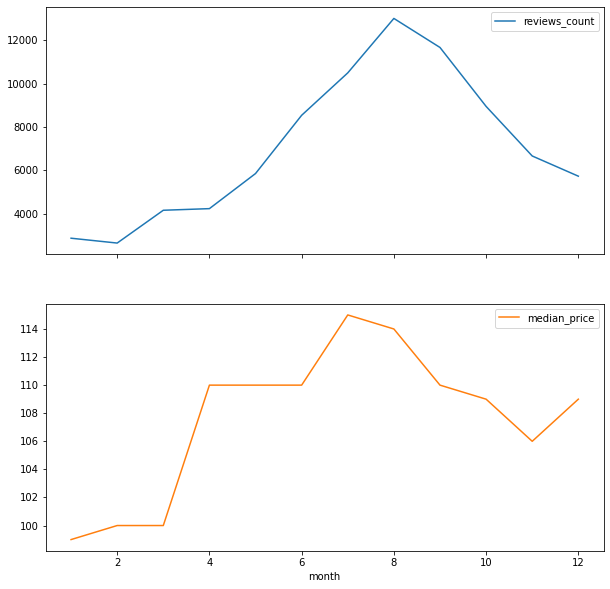

In [18]:
df_combined.plot.line(
    x='month',
    y=['reviews_count', 'median_price'],
    subplots=True, 
    figsize=(10,10)
)

the period between July and September is the busiest within a year and the median price is ~$114 and average price is ~$151